In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_classification
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score

from matplotlib.patches import Patch
from matplotlib import cm
from scipy.spatial import Voronoi, voronoi_plot_2d


In [2]:
def eval_clustering(X, labels, n_clusters, ax=None, title_suffix=''):
    if ax is None:
        ax = plt.gca()

    sil_avg = silhouette_score(X, labels)
    sample_sil_val = silhouette_samples(X, labels)

    unique_labels = np.unique(labels)
    cmap = cm.tab10
    color_dict = {label: cmap(float(label)/ n_clusters) for label in unique_labels}
    y_low = 10

    for i in unique_labels:
        ith_cluster_sil_val = sample_sil_val[labels == i]
        ith_cluster_sil_val.sort()
        size_cluster_i = ith_cluster_sil_val.shape[0]
        y_up = y_low + size_cluster_i
        color = color_dict[i]
        ax.fill_betweenx(np.arange(y_low, y_up), 0, ith_cluster_sil_val, facecolor=color, ec=color, alpha=0.7)
        ax.text(-0.05, y_low+0.5*size_cluster_i, str(i))
        y_low = y_up + 10

    ax.set_title(f"Silhouette Score for {title_suffix}\n" +
                 f"Average Silhouette: {sil_avg:.2f}")
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster')
    ax.axvline(x=sil_avg, color='red', linestyle="--")
    ax.set_xlim([-0.25, 1])
    ax.set_yticks([])

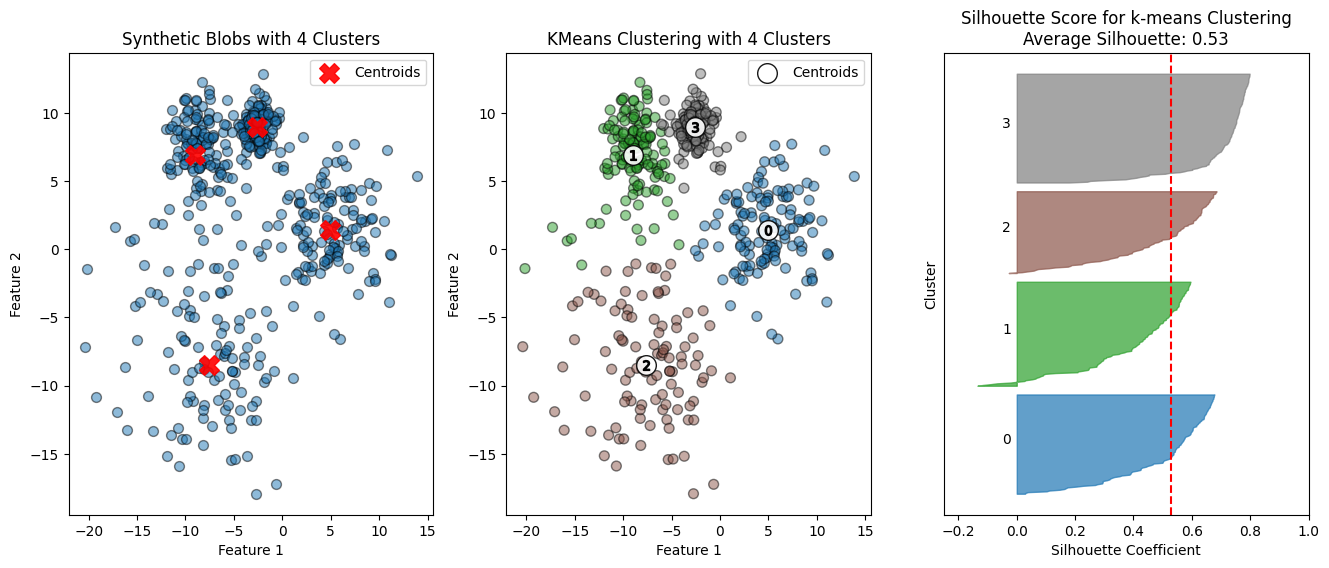

In [3]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=[1, 3, 5, 2], random_state=42)

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X)

cmap = cm.tab10

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.5, ec='k')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', alpha=0.9, label='Centroids')
plt.title(f"Synthetic Blobs with {n_clusters} Clusters")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

colors = cmap(y_kmeans.astype(float) / n_clusters)

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=colors, s=50, alpha=0.5, ec='k')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=0.9, s=200, ec='k', label='Centroids')

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, ec='k')

plt.title(f"KMeans Clustering with {n_clusters} Clusters")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 3, 3)
eval_clustering(X, y_kmeans, n_clusters, title_suffix='k-means Clustering')
plt.show()

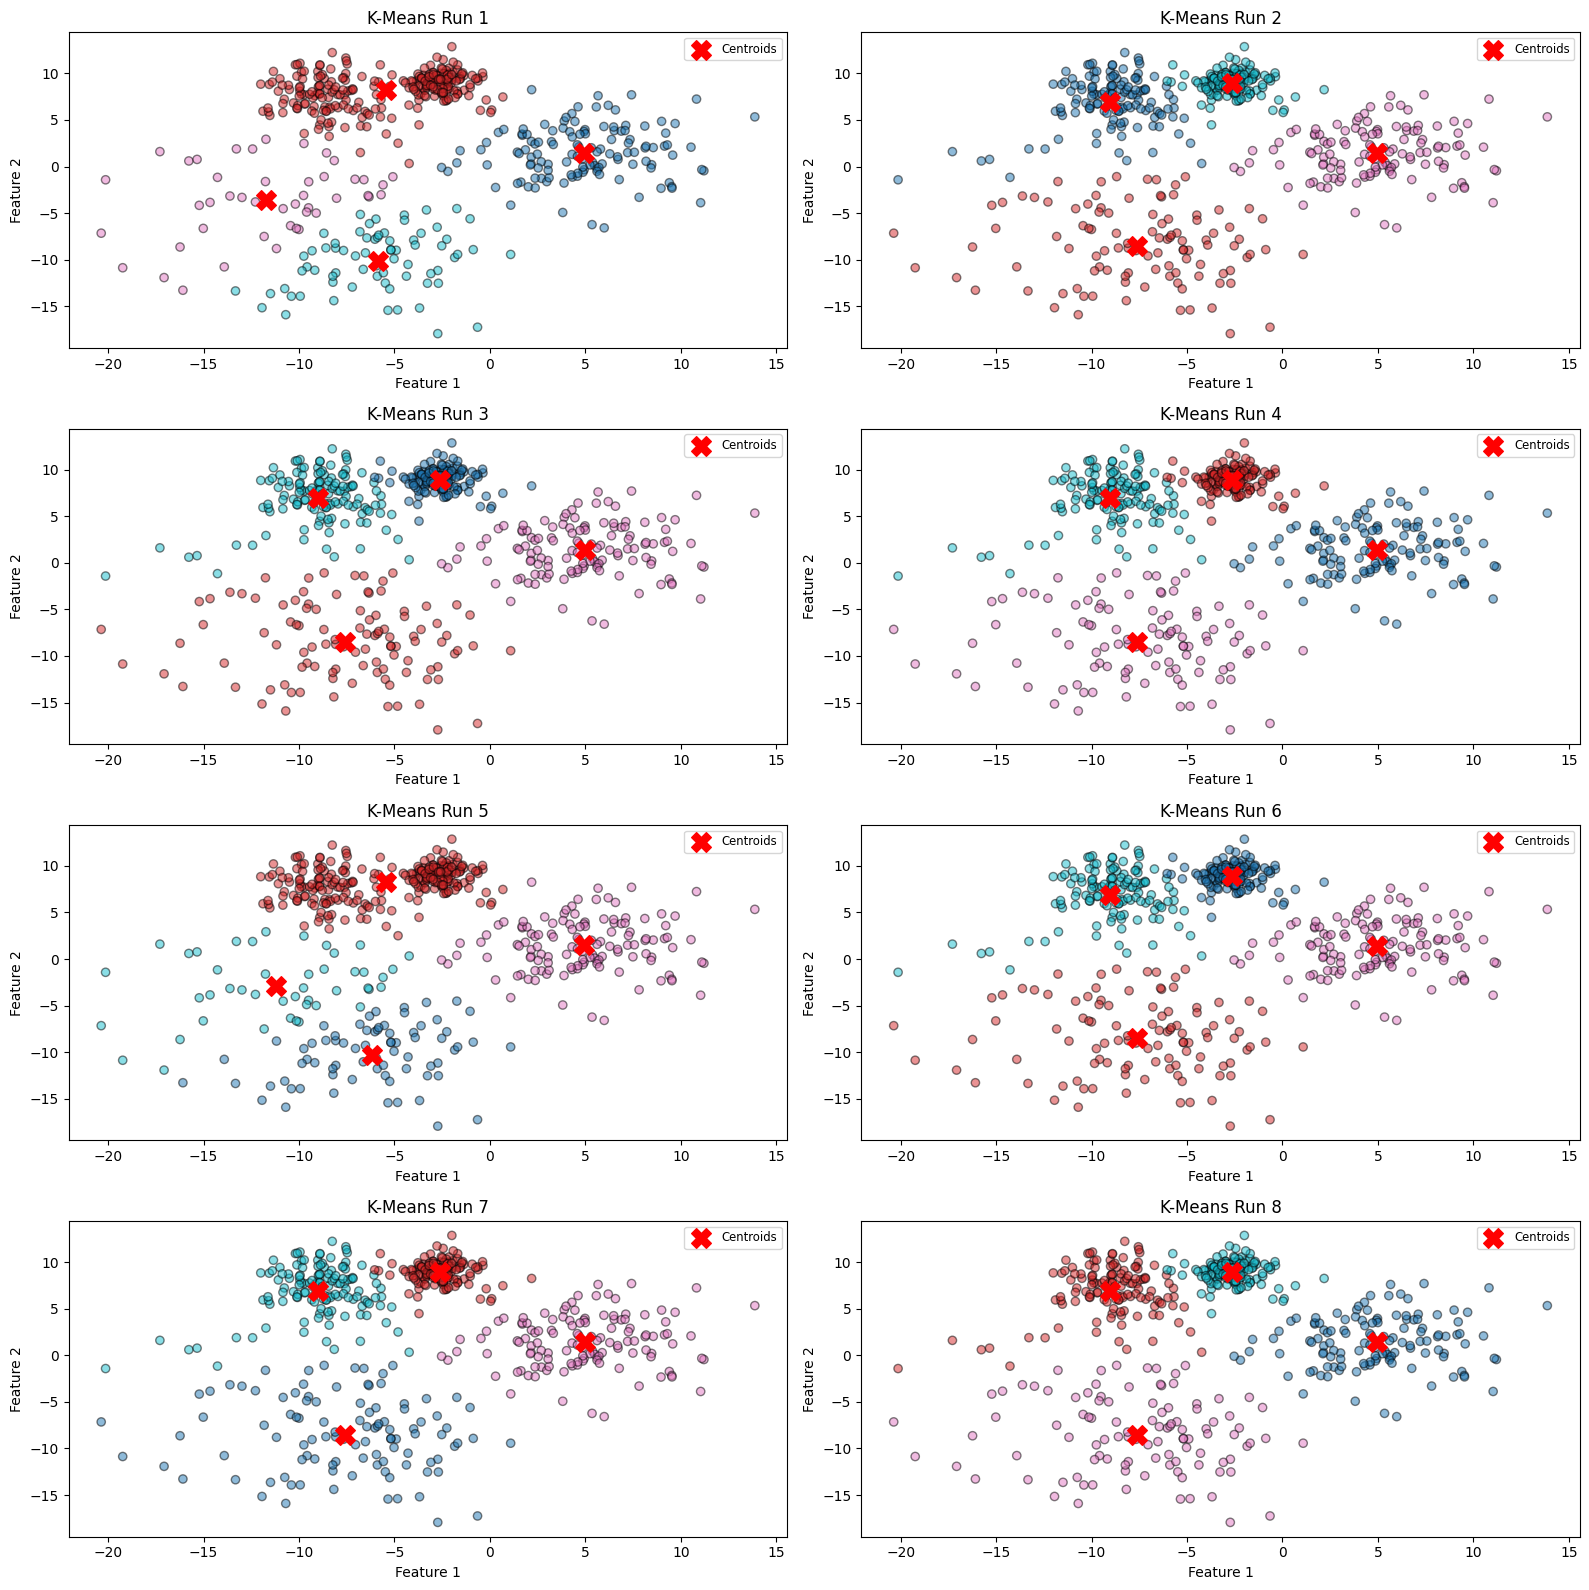

Run 1: Inertia=8575.44
Run 2: Inertia=7633.51
Run 3: Inertia=7633.51
Run 4: Inertia=7633.51
Run 5: Inertia=8556.71
Run 6: Inertia=7633.51
Run 7: Inertia=7633.51
Run 8: Inertia=7633.51


In [ ]:
# Cluster assignment using different initial centroid seeds
n = 8
inertia_val = []

# For subplots
n_cols = 2
n_rows = -(-n // n_cols)
plt.figure(figsize=(16, 16))

for i in range(n):
    kmeans = KMeans(n_clusters=4, random_state=None)
    kmeans.fit(X)
    inertia_val.append(kmeans.inertia_)

    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='tab10', alpha=0.5, ec='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title(f'K-Means Run {i + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

for i, inertia in enumerate(inertia_val, start=1):
    print(f'Run {i}: Inertia={inertia:.2f}')

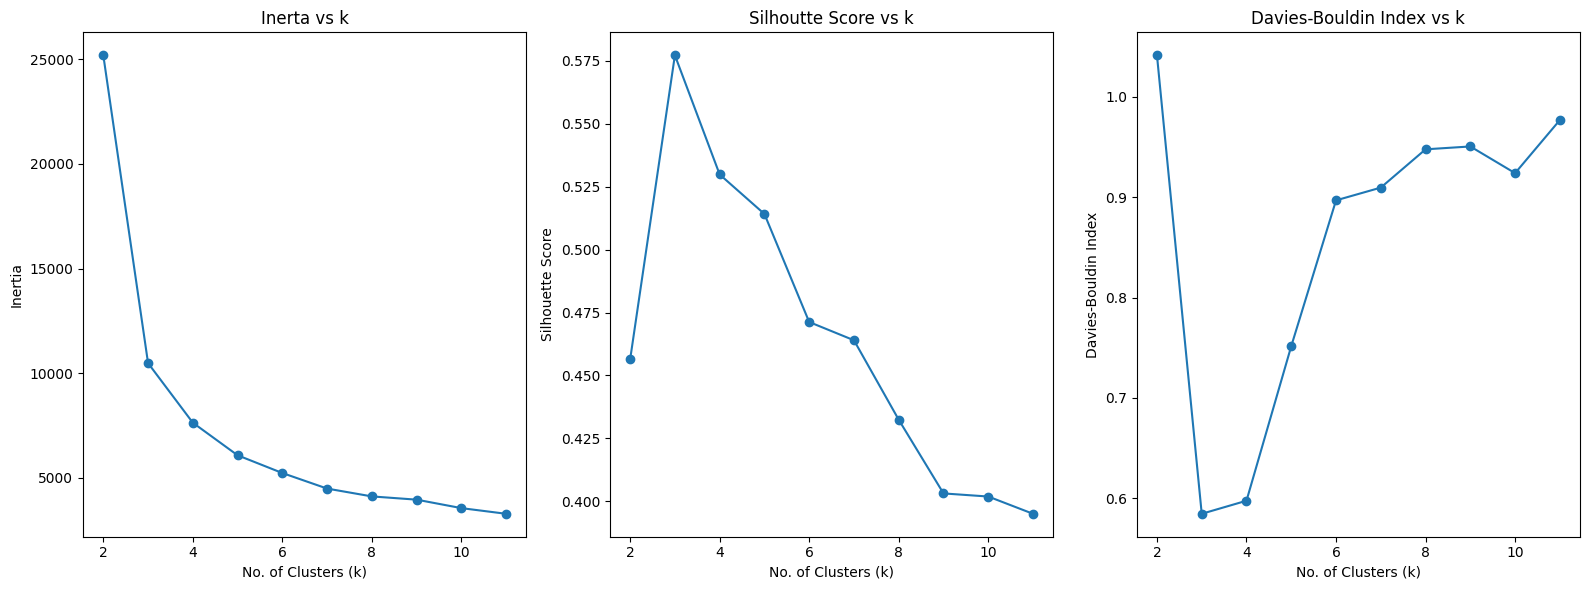

In [6]:
k = range(2, 12)

inertia_values = []
sil_score = []
da_bo_indices = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    y_pred = kmeans.fit_predict(X)

    inertia_values.append(kmeans.inertia_)
    sil_score.append(silhouette_score(X, y_pred))
    da_bo_indices.append(davies_bouldin_score(X, y_pred))

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.plot(k, inertia_values, marker='o')
plt.title('Inerta vs k')
plt.xlabel('No. of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 3, 2)
plt.plot(k, sil_score, marker='o')
plt.title('Silhoutte Score vs k')
plt.xlabel('No. of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 3)
plt.plot(k, da_bo_indices, marker='o')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('No. of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

Optimal Clusters according to the plots

1. Inertia : k = 3 or k = 4
2. Silhouette Score: k = 3
3. Davies-Bouldin Score: k = 3 or k = 4

C:\Users\omama\AppData\Local\Temp\ipykernel_12624\3055668864.py:27: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\omama\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


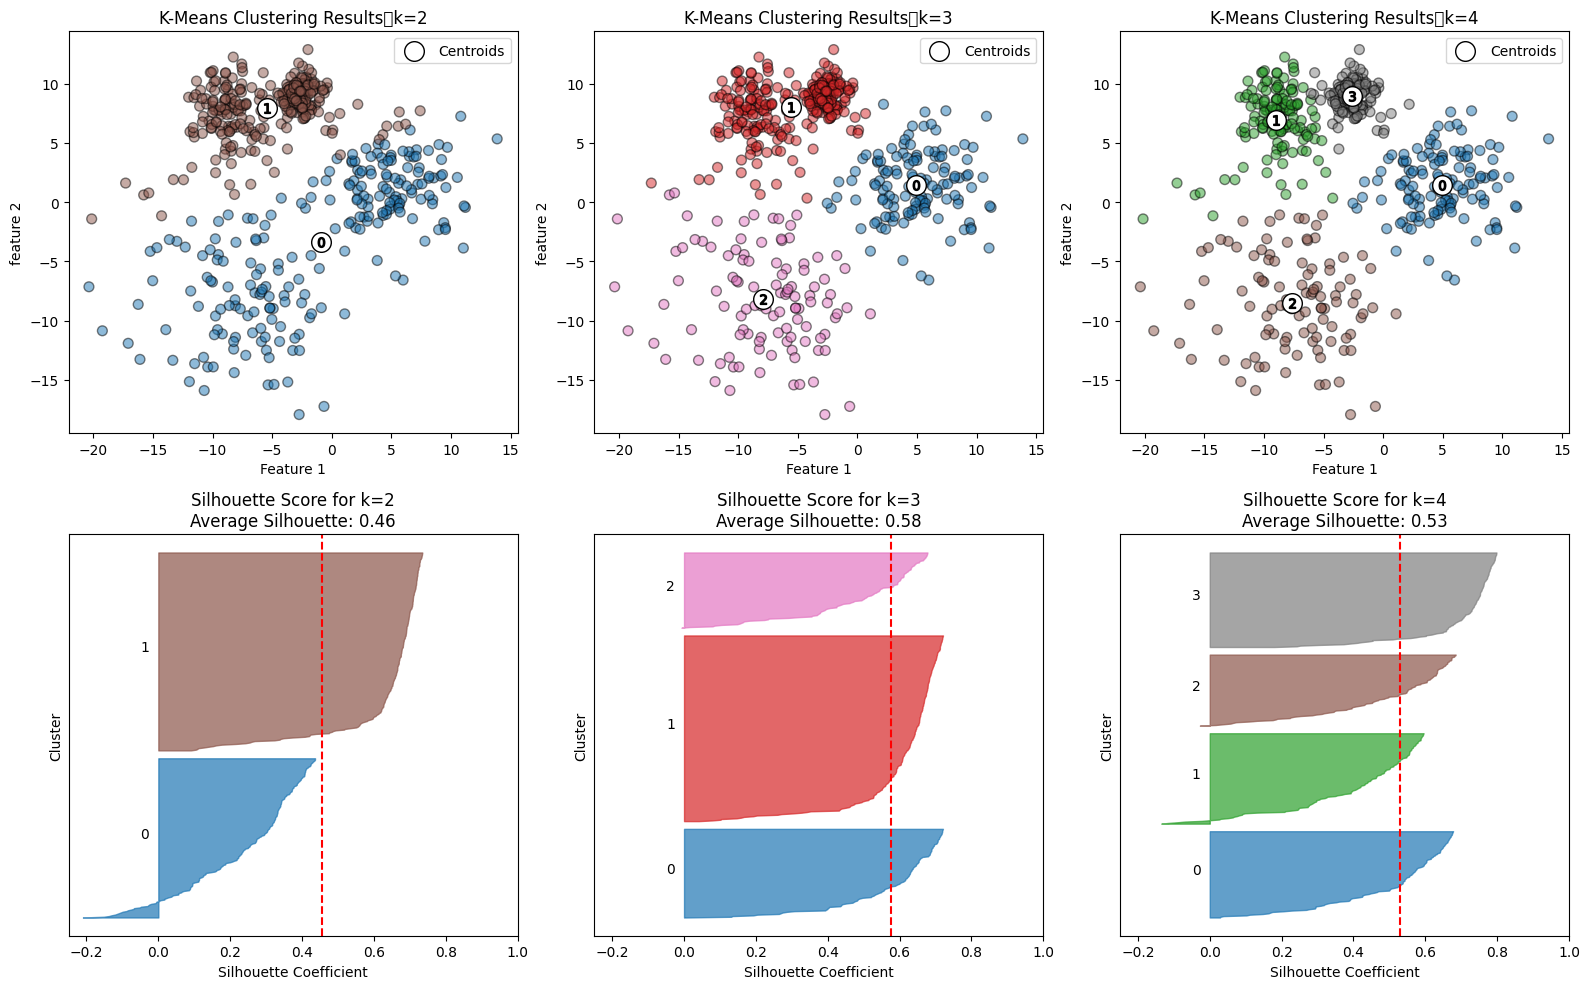

In [11]:
plt.figure(figsize=(16, 10))
cmap = cm.tab10

for i, k in enumerate([2, 3, 4]):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    colors = cmap(y_kmeans.astype(float) / k)
    centers = kmeans.cluster_centers_

    ax1 = plt.subplot(2, 3, i + 1)
    ax1.scatter(X[:, 0], X[:, 1], c=colors, s=50, alpha=0.5, ec='k')

    plt.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, ec='k', label='Centroids')

    for j, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker="$%d$" % j, alpha=1, s=50, ec='k')

    ax1.set_title("K-Means Clustering Results\tk={}".format(k))
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('feature 2')
    ax1.legend()

    ax2 = plt.subplot(2, 3, i + 4)
    eval_clustering(X, y_kmeans, k, ax=ax2, title_suffix=f"k={k}")

plt.tight_layout()
plt.show()

2-D dataset of 3 classes with data points shaped differently.

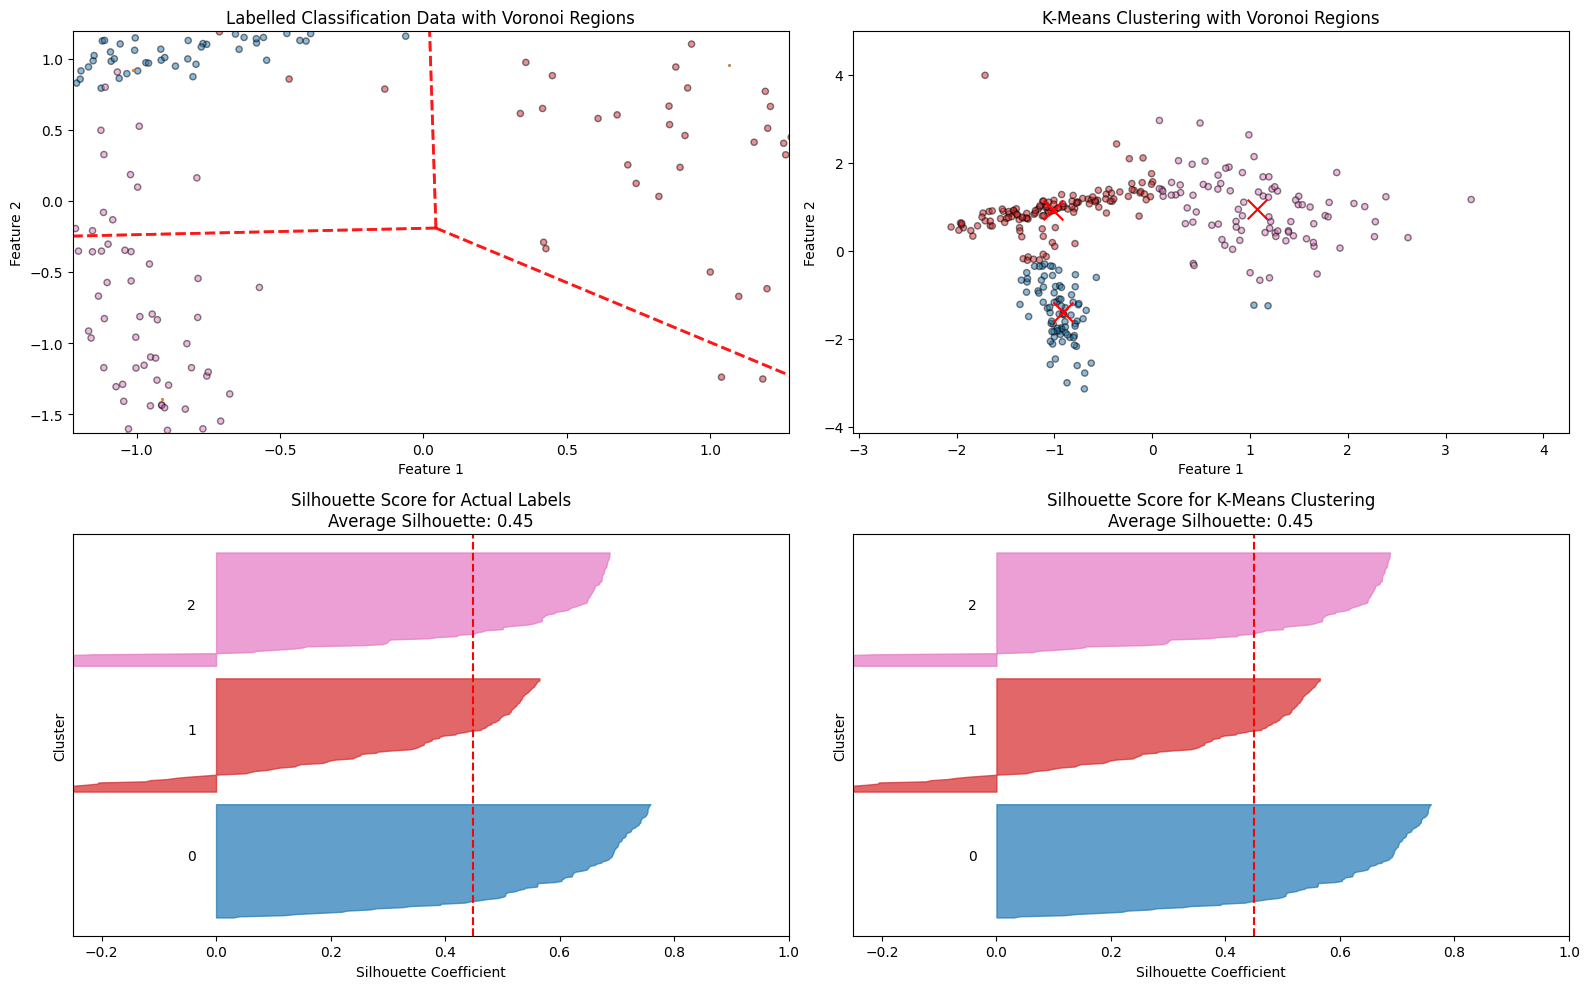

In [13]:
X, y = make_classification(n_samples=300, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3,
                           random_state=42)

kmeans= KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

vor = Voronoi(centers)

fig, ax = plt.subplots(2, 2, figsize=(16, 10))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

cmap = cm.tab10
colors = cmap(y.astype(float) / 3)

# Plot actual labels with Voronoi regions
ax[0, 0].scatter(X[:, 0], X[:, 1], c=colors, s=20, alpha=0.5, ec='k')
voronoi_plot_2d(vor, ax=ax[0, 0], show_vertices=False, line_colors='red', line_width=2, line_alpha=0.7, point_size=2)
ax[0, 0].set_title('Labelled Classification Data with Voronoi Regions')
ax[0 ,0].set_xlabel('Feature 1')
ax[0 ,0].set_ylabel('Feature 2')
ax[0, 0].set_xlim(x_min, x_max)
ax[0, 0].set_ylim(y_min, y_max)

eval_clustering(X, y, n_clusters=3, ax=ax[1, 0], title_suffix='Actual Labels')

# Plot results with Voronoi regions
colors_k = cmap(y_kmeans.astype(float) / 3)
ax[0, 1].scatter(X[:, 0], X[:, 1], c=colors_k, s=20, alpha=0.5, ec='k')
ax[0, 1].scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='x', label='Centroids')
voronoi_plot_2d(vor, ax=ax[0, 0], show_vertices=False, line_colors='red', line_width=2, line_alpha=0.7, point_size=2)
ax[0, 1].set_title('K-Means Clustering with Voronoi Regions')
ax[0 ,1].set_xlabel('Feature 1')
ax[0 ,1].set_ylabel('Feature 2')
ax[0, 1].set_xlim(x_min, x_max)
ax[0, 1].set_ylim(y_min, y_max)

eval_clustering(X, y, n_clusters=3, ax=ax[1, 1], title_suffix='K-Means Clustering')

plt.tight_layout()
plt.show()

K-means classified most of the points correctly according to actual classes.

The red-dashed lines in the plots indicate boundaries between the "voronoi" regions that separate clusters.